In [19]:
!pip install torch
!pip install dgl==0.9.0
!pip install torch_geometric
!pip install tensorflow

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
from natsort import natsorted
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import FastText
import matplotlib.pyplot as plt
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import dgl.data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense,Bidirectional
from tensorflow.keras.regularizers import l2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
import numpy as np
from numpy.linalg import norm
from dgl.nn import GraphConv
from IPython.display import FileLink


In [21]:
# !pip install torch==2.2.0

In [22]:
# !pip install dgl torch_geometric tensorflow

In [23]:
image_features=pd.read_csv('/Image_features_Densenet.csv')

image_features.drop(['Unnamed: 0'],axis=1,inplace=True)

In [24]:
image_features

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,-2.637099,-0.347802,-1.305130,0.477352,0.222379,2.597939,1.865067,-0.494544,0.243539,0.256078,...,0.245732,0.019818,-0.246347,-0.334189,0.001933,0.099690,0.005821,0.098615,0.322466,-0.026514
1,-2.798194,3.634745,2.086230,3.196251,1.620699,-0.670871,1.726479,-0.083495,0.892471,0.753701,...,-0.439034,-0.363662,0.125037,-0.009941,0.000198,0.598846,0.399056,-0.448141,-0.133951,0.163589
2,-1.739392,-1.241732,-1.321686,-1.510875,-0.779627,-1.543128,1.477094,-1.396603,0.295762,-0.055510,...,-0.171100,0.180284,0.044292,0.000196,0.003606,-0.028537,0.019995,0.014549,-0.207424,-0.134106
3,-0.994942,1.074568,1.187057,1.138465,-0.079325,-4.044148,1.202367,-0.249646,-0.755334,1.255697,...,0.026375,0.007201,-0.165179,-0.136537,0.035306,-0.042689,-0.063572,-0.160413,0.073046,-0.025301
4,-1.329136,2.676327,0.291800,0.271295,-0.906031,-1.966462,1.868663,-1.244299,-0.616884,-0.451323,...,-0.145272,0.047353,-0.150540,-0.009131,-0.106808,-0.137046,-0.175852,0.152502,0.045290,-0.086046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-0.328603,3.061680,2.256522,-0.424378,-1.868915,-0.350414,0.226009,1.162425,0.603590,-0.217285,...,0.227745,0.008060,-0.163510,0.093020,-0.086098,0.027652,0.021020,0.002824,-0.078523,-0.032950
102,-0.718224,0.687967,-1.267417,-0.670412,-1.567853,1.657080,0.818342,0.515184,-0.144439,0.125603,...,-0.044075,0.357937,0.251036,-0.005687,0.141986,-0.258837,0.109927,-0.115133,-0.061322,-0.033643
103,0.445232,1.184668,0.467780,-2.138310,-1.128685,-0.514149,0.245567,2.021899,0.228138,-0.953547,...,-0.011740,0.419290,0.062435,0.191918,0.126068,0.287123,-0.040200,0.194610,-0.116119,0.169397
104,-1.120806,0.495716,0.477714,-1.356863,-0.036207,0.809519,-0.160998,-0.731385,1.327201,0.967042,...,-0.069784,0.047647,-0.162943,-0.053178,0.104861,0.008137,-0.253575,-0.041771,-0.019096,0.024908


In [25]:
text_features=pd.read_csv('/Text_features_roberta.csv')

# text_features.drop(['Unnamed: 0','index'],axis=1,inplace=False)

In [26]:
text_features

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.048460,0.084757,0.003497,-0.087329,0.059048,-0.209606,-0.006506,0.048831,0.017141,-0.048087,...,0.013604,0.032850,-0.101248,-0.028741,-0.000748,0.088436,0.065536,-0.118125,-0.061766,-0.032498
1,-0.065723,0.025389,-0.025804,-0.130403,0.077852,-0.120231,-0.001798,0.034838,0.010572,-0.088210,...,0.007799,0.013520,-0.135819,-0.036519,-0.043678,0.078114,0.019443,-0.130293,-0.037107,0.014137
2,-0.045842,0.040817,-0.028311,-0.119993,0.082768,-0.169268,-0.019755,0.051325,0.019362,-0.082979,...,0.033639,0.019891,-0.131964,-0.049223,-0.001145,0.100791,0.072946,-0.162404,-0.066192,0.011734
3,-0.049971,0.032408,-0.005414,-0.096241,0.066642,-0.137509,-0.046769,0.021914,0.060602,-0.076358,...,0.071187,-0.008804,-0.099127,-0.071892,-0.024793,0.082018,0.093390,-0.118121,-0.078987,0.012262
4,-0.045510,0.020915,-0.008356,-0.120176,0.046261,-0.174338,-0.013932,0.018657,0.020323,-0.080896,...,0.047783,-0.003582,-0.096276,-0.044621,-0.051367,0.058235,0.079637,-0.182815,-0.076388,0.035959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-0.060480,0.032145,0.005485,-0.084974,0.062038,-0.145933,-0.047886,0.023430,-0.000973,-0.073406,...,0.071269,0.011389,-0.102351,-0.069919,0.001416,0.078189,0.042280,-0.141668,-0.042697,-0.004684
102,-0.055155,-0.000772,-0.013739,-0.069411,0.043931,-0.236069,0.007162,0.073971,-0.005430,-0.089415,...,0.040675,0.040890,-0.107817,-0.040903,-0.034730,0.079233,0.068175,-0.142191,-0.074767,0.024146
103,-0.040352,-0.013974,-0.021251,-0.069300,0.054273,-0.207470,-0.014627,0.039035,0.016669,-0.079122,...,0.059889,0.024202,-0.134411,-0.076633,-0.022368,0.069342,0.052974,-0.124388,-0.036107,0.016075
104,-0.051738,0.011170,-0.012154,-0.084336,0.054111,-0.143253,-0.028876,0.015378,0.012340,-0.065018,...,0.076928,0.016929,-0.126763,-0.078424,-0.036591,0.099697,0.058289,-0.105556,-0.050893,-0.016323


In [27]:
MM= pd.concat([text_features,image_features], axis=1)
X_train=MM.values

In [28]:
X_train.shape

(106, 862)

In [29]:
X_train_df=pd.DataFrame(X_train)
X_train_df_copy=X_train_df.copy()
X_train_df.reset_index(inplace=True)


Src_ID=[i for i in range(0,106) for _ in range(0,105-i)]
Dst_ID=[i for i in range(0,106) for i in range(1+i,106)]
elements_to_repeat=X_train.tolist()
repetition_counts=[105-i for i in range(0,105)]

Src_feature=[]
for element, count in zip(elements_to_repeat, repetition_counts):
    Src_feature.extend([element] * count)

Dst_feature=[]
for i in range(1,106):
    for j in range(i,106):
        Dst_feature.append(X_train.tolist()[j])

Nodes_Data=pd.DataFrame()
Nodes_Data['Id']=[i for i in range(0,106)]
labels = pd.read_csv("/AnimalLabels.csv")
labels['majority_vote'] = labels.mode(axis=1, numeric_only=True).astype(int)
Nodes_Data['features']=X_train.tolist()
Nodes_Data['label']=labels['majority_vote']

dup=[0 for i in range(0,106)]
Edge=pd.DataFrame()
Edge['Src Id']=Src_ID
Edge['Src_feature']=Src_feature
Edge['Dst_feature']=Dst_feature
Edge['Dst Id']=Dst_ID


Src_Ids=[i for i in range(0,106) for _ in range(0,106)]
Dst_Ids = [i % 106 for i in range(106 * 106)]
Src_features=[X_train.tolist()[i] for i in range(0,106)  for i in range(0,106)]
elements_to_repeat=X_train.tolist()
repetition_counts=[106 for i in range(0,106)]
Dst_features=[]
for element, count in zip(elements_to_repeat, repetition_counts):
    Dst_features.extend([element] * count)

Edge_Data=pd.DataFrame()
Edge_Data['Src Ids']=Src_Ids
Edge_Data['Src_features']=Src_features
Edge_Data['Dst_features']=Dst_features
Edge_Data['Dst Ids']=Dst_Ids

edge_weight=[]
for i in range(0,5565):
    A=np.array(Edge['Src_feature'][i])
    B=np.array(Edge['Dst_feature'][i])
    Cosine_similarity=np.dot(A,B)/(norm(A)*norm(B))
    edge_weight.append(Cosine_similarity)

for i in range(len(edge_weight)):
    if edge_weight[i]<0:
        edge_weight[i]=0

Edge['edge weights']=edge_weight


edge_weights=[]
for i in range(0,11236):
    A=np.array(Edge_Data['Src_features'][i])
    B=np.array(Edge_Data['Dst_features'][i])
    Cosine_similarity=np.dot(A,B)/(norm(A)*norm(B))
    edge_weights.append(Cosine_similarity)

Edge_Data['edge weights']=edge_weights

In [30]:
edge_weight

[0.7796408548409581,
 0.8328019906396308,
 0.7055243988750663,
 0.7783259481411773,
 0.7303962666612972,
 0.7733989820689057,
 0.7971934674773552,
 0.8466760112771331,
 0.8313724121864834,
 0.7746195572377169,
 0.778993676050981,
 0.8064765268039201,
 0.8200837856769234,
 0.8228050526582315,
 0.8505785026801473,
 0.8468109835186194,
 0.8391249935748182,
 0.8594215058992217,
 0.8551725073774077,
 0.7560562241592254,
 0.7408735903624087,
 0.8131463158331481,
 0.7552695852073049,
 0.794431209754382,
 0.8188852631308657,
 0.8099809697076356,
 0.7832908870742487,
 0.7501994611411947,
 0.802441650726862,
 0.6773879384917223,
 0.7402084274347283,
 0.826395132973987,
 0.8640246938569972,
 0.8615927779123032,
 0.8457298347467002,
 0.8767925723939515,
 0.864314541154144,
 0.8516803080583467,
 0.8753059310810704,
 0.7597401378730584,
 0.6989821107853115,
 0.7589187790192264,
 0.7377170566296561,
 0.7661386361877413,
 0.7563664462256254,
 0.7862697630233826,
 0.7816503644684977,
 0.810464051743088

In [31]:
Edge_Data

,Src Ids,Src_features,Dst_features,Dst Ids,edge weights
0,0,"[-0.04845981, 0.08475658, 0.0034967388, -0.087...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",0,1.000000
1,0,"[-0.06572274, 0.025389247, -0.025804423, -0.13...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",1,0.779641
2,0,"[-0.045841996, 0.040817425, -0.028310552, -0.1...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",2,0.832802
3,0,"[-0.049970612, 0.03240784, -0.0054141465, -0.0...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",3,0.705524
4,0,"[-0.045510203, 0.020915393, -0.008356429, -0.1...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",4,0.778326
...,...,...,...,...,...
11231,105,"[-0.060479827, 0.032145437, 0.005485486, -0.08...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",101,0.815028
11232,105,"[-0.05515463, -0.00077195856, -0.013739326, -0...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",102,0.842930
11233,105,"[-0.040351998, -0.013974475, -0.021250768, -0....","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",103,0.818225
11234,105,"[-0.051737767, 0.011169992, -0.012154045, -0.0...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",104,0.873431


In [32]:
Edge_Data[Edge_Data['Dst Ids']==7]

,Src Ids,Src_features,Dst_features,Dst Ids,edge weights
7,0,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.04845981, 0.08475658, 0.0034967388, -0.087...",7,0.797193
113,1,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",7,0.890542
219,2,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.045841996, 0.040817425, -0.028310552, -0.1...",7,0.758308
325,3,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.049970612, 0.03240784, -0.0054141465, -0.0...",7,0.802029
431,4,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.045510203, 0.020915393, -0.008356429, -0.1...",7,0.868480
...,...,...,...,...,...
10713,101,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.060479827, 0.032145437, 0.005485486, -0.08...",7,0.757850
10819,102,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.05515463, -0.00077195856, -0.013739326, -0...",7,0.765576
10925,103,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.040351998, -0.013974475, -0.021250768, -0....",7,0.740589
11031,104,"[-0.058395185, 0.055415377, -0.010777363, -0.1...","[-0.051737767, 0.011169992, -0.012154045, -0.0...",7,0.759395


In [33]:
ff=Edge_Data[Edge_Data['Src Ids']!=0 ]

In [34]:
ff[ff['edge weights']>=0.329]


,Src Ids,Src_features,Dst_features,Dst Ids,edge weights
106,1,"[-0.04845981, 0.08475658, 0.0034967388, -0.087...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",0,0.779641
107,1,"[-0.06572274, 0.025389247, -0.025804423, -0.13...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",1,1.000000
108,1,"[-0.045841996, 0.040817425, -0.028310552, -0.1...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",2,0.704318
109,1,"[-0.049970612, 0.03240784, -0.0054141465, -0.0...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",3,0.794569
110,1,"[-0.045510203, 0.020915393, -0.008356429, -0.1...","[-0.06572274, 0.025389247, -0.025804423, -0.13...",4,0.823870
...,...,...,...,...,...
11231,105,"[-0.060479827, 0.032145437, 0.005485486, -0.08...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",101,0.815028
11232,105,"[-0.05515463, -0.00077195856, -0.013739326, -0...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",102,0.842930
11233,105,"[-0.040351998, -0.013974475, -0.021250768, -0....","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",103,0.818225
11234,105,"[-0.051737767, 0.011169992, -0.012154045, -0.0...","[-0.051058244, 0.0287344, -0.0021639222, -0.12...",104,0.873431


In [35]:
print(Edge['edge weights'].describe())
ninetyfive_percentile = Edge['edge weights'].quantile(0.95)
print("95th percentile of edge weights column:", ninetyfive_percentile)

count    5565.000000
mean        0.753111
std         0.083432
min         0.464252
25%         0.700562
50%         0.759550
75%         0.811976
max         0.989819
Name: edge weights, dtype: float64
95th percentile of edge weights column: 0.8765416432055043


In [36]:
# percentiles=[round(0.852597,4),round(0.879359,4),round(0.900892,4),round(0.9330570901928656,4)]

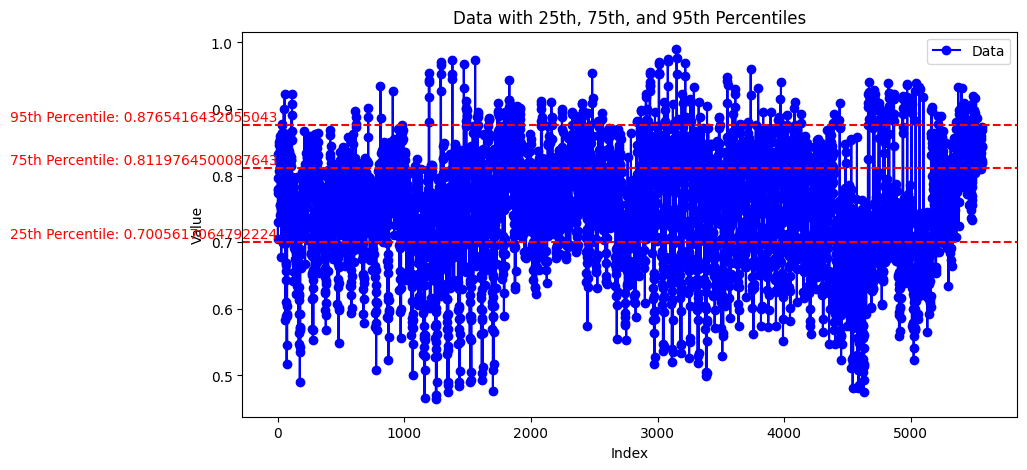

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Sample list of values

# Calculate the 25th, 75th, and 95th percentiles
percentiles = np.percentile(edge_weight, [25, 75, 95])
percentile_labels = ['25th Percentile', '75th Percentile', '95th Percentile']

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(edge_weight, marker='o', linestyle='-', color='b', label='Data')

# Mark the percentiles
for i, perc in enumerate(percentiles):
    plt.axhline(y=perc, color='r', linestyle='--')
    plt.text(0, perc, f'{percentile_labels[i]}: {perc}', color='r', ha='right', va='bottom')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data with 25th, 75th, and 95th Percentiles')
plt.legend()

# Show the plot
plt.show()

In [38]:
edge_weight

[0.7796408548409581,
 0.8328019906396308,
 0.7055243988750663,
 0.7783259481411773,
 0.7303962666612972,
 0.7733989820689057,
 0.7971934674773552,
 0.8466760112771331,
 0.8313724121864834,
 0.7746195572377169,
 0.778993676050981,
 0.8064765268039201,
 0.8200837856769234,
 0.8228050526582315,
 0.8505785026801473,
 0.8468109835186194,
 0.8391249935748182,
 0.8594215058992217,
 0.8551725073774077,
 0.7560562241592254,
 0.7408735903624087,
 0.8131463158331481,
 0.7552695852073049,
 0.794431209754382,
 0.8188852631308657,
 0.8099809697076356,
 0.7832908870742487,
 0.7501994611411947,
 0.802441650726862,
 0.6773879384917223,
 0.7402084274347283,
 0.826395132973987,
 0.8640246938569972,
 0.8615927779123032,
 0.8457298347467002,
 0.8767925723939515,
 0.864314541154144,
 0.8516803080583467,
 0.8753059310810704,
 0.7597401378730584,
 0.6989821107853115,
 0.7589187790192264,
 0.7377170566296561,
 0.7661386361877413,
 0.7563664462256254,
 0.7862697630233826,
 0.7816503644684977,
 0.810464051743088

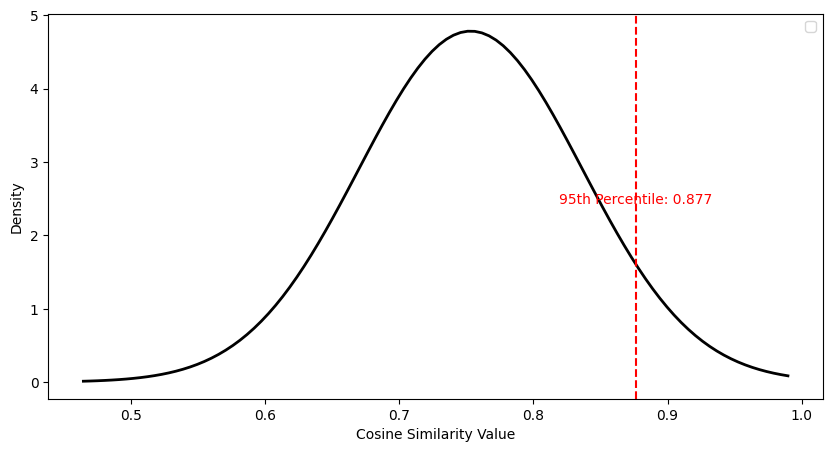

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample list of values

# Fit data to a normal distribution
mu, std = stats.norm.fit(edge_weight)

# Generate a range of values for the x-axis
xmin, xmax = min(edge_weight), max(edge_weight)
x = np.linspace(xmin, xmax, 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Calculate the 25th, 75th, and 95th percentiles
percentiles = np.percentile(edge_weight, [95])
percentile_labels = ['95th Percentile']

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)

# Mark the percentiles
for i, perc in enumerate(percentiles):
    plt.axvline(x=perc, color='r', linestyle='--')
    plt.text(perc, max(p)*0.5, f'{percentile_labels[i]}: {perc:.3f}', color='r', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Cosine Similarity Value')
plt.ylabel('Density')
#plt.title('Cosine similarities with 95th Percentiles')
plt.legend()
#plt.ylim(0, 5)
# Show the plot
plt.show()

In [40]:
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import torch
from dgl.data import DGLDataset
edge_weight=[]


class KarateClubDataset(DGLDataset):
    def __init__(self, threshold):
        self.threshold = threshold
        super().__init__(name="karate_club")

    def process(self):
        edge_remove = []
        C = edge_weights
        for i in range(len(C)):
            if C[i] <= self.threshold:
                edge_remove.append(i)
            else:
                edge_weight.append(C[i])

        nodes_data = Nodes_Data
        edges_data = Edge_Data

        # Fix the non-writable tensor warning
        features_array = np.array(nodes_data["features"].tolist(), dtype=float)
        node_features = torch.from_numpy(features_array).clone()  # Ensure it's writable

        node_labels = torch.tensor(
            nodes_data["label"].astype("category").cat.codes.to_numpy(),
            dtype=torch.int64  # Ensure proper dtype
        )

        edge_features = torch.tensor(
            edges_data["edge weights"].to_numpy(),
            dtype=torch.float32  # Edge weights can stay as float32
        )

        # Fix data type of edge indices
        edges_src = torch.tensor(
            edges_data["Src Ids"].to_numpy(),
            dtype=torch.int64
        )
        edges_dst = torch.tensor(
            edges_data["Dst Ids"].to_numpy(),
            dtype=torch.int64
        )

        # Build the graph
        self.graph = dgl.graph(
            (edges_src, edges_dst), num_nodes=nodes_data.shape[0]
        )

        self.graph.ndata["feat"] = node_features
        self.graph.ndata["label"] = node_labels
        self.graph.edata["weight"] = edge_features

        # Remove edges below the threshold
        self.graph = dgl.remove_edges(self.graph, torch.tensor(edge_remove, dtype=torch.int64))

        # Create train, validation, and test masks
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train: n_train + n_val] = True
        test_mask[n_train + n_val:] = True
        self.graph.ndata["train_mask"] = train_mask
        self.graph.ndata["val_mask"] = val_mask
        self.graph.ndata["test_mask"] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = KarateClubDataset(0.231)
g = dataset[0]

print(g)

Graph(num_nodes=106, num_edges=11236,
      ndata_schemes={'feat': Scheme(shape=(862,), dtype=torch.float64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})


In [41]:
new_g = dgl.compact_graphs(g)
train_mask = g.ndata["train_mask"]

for i in range(106):
    train_mask[i] = True

indices_to_change = [4, 105, 84, 27, 98, 88, 18, 65, 9, 2, 5, 49, 99, 69, 86, 67, 7, 28, 78, 70, 18, 74]
train_mask[indices_to_change] = False
g.ndata["train_mask"]=train_mask

test_mask = ~train_mask
g.ndata["test_mask"]=test_mask

Edge_Data_train = Edge_Data[~(Edge_Data['Src Ids'].isin(indices_to_change)) & ~(Edge_Data['Dst Ids'].isin(indices_to_change)) & Edge_Data['edge weights']>0.8258]
Edge_Data_train = Edge_Data_train[Edge_Data_train['edge weights']>0.8258]


Edge_Data_test = Edge_Data[Edge_Data['Src Ids'].isin(indices_to_change) & Edge_Data['Dst Ids'].isin(indices_to_change) & Edge_Data['edge weights']>0.8258]
Edge_Data_test = Edge_Data_test[Edge_Data_test['edge weights']>0.8258]


sg_train=dgl.node_subgraph(g, train_mask)

sg_test = dgl.node_subgraph(g, test_mask)



In [42]:
X_train_df

,index,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,861
0,0,-0.048460,0.084757,0.003497,-0.087329,0.059048,-0.209606,-0.006506,0.048831,0.017141,...,0.245732,0.019818,-0.246347,-0.334189,0.001933,0.099690,0.005821,0.098615,0.322466,-0.026514
1,1,-0.065723,0.025389,-0.025804,-0.130403,0.077852,-0.120231,-0.001798,0.034838,0.010572,...,-0.439034,-0.363662,0.125037,-0.009941,0.000198,0.598846,0.399056,-0.448141,-0.133951,0.163589
2,2,-0.045842,0.040817,-0.028311,-0.119993,0.082768,-0.169268,-0.019755,0.051325,0.019362,...,-0.171100,0.180284,0.044292,0.000196,0.003606,-0.028537,0.019995,0.014549,-0.207424,-0.134106
3,3,-0.049971,0.032408,-0.005414,-0.096241,0.066642,-0.137509,-0.046769,0.021914,0.060602,...,0.026375,0.007201,-0.165179,-0.136537,0.035306,-0.042689,-0.063572,-0.160413,0.073046,-0.025301
4,4,-0.045510,0.020915,-0.008356,-0.120176,0.046261,-0.174338,-0.013932,0.018657,0.020323,...,-0.145272,0.047353,-0.150540,-0.009131,-0.106808,-0.137046,-0.175852,0.152502,0.045290,-0.086046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,-0.060480,0.032145,0.005485,-0.084974,0.062038,-0.145933,-0.047886,0.023430,-0.000973,...,0.227745,0.008060,-0.163510,0.093020,-0.086098,0.027652,0.021020,0.002824,-0.078523,-0.032950
102,102,-0.055155,-0.000772,-0.013739,-0.069411,0.043931,-0.236069,0.007162,0.073971,-0.005430,...,-0.044075,0.357937,0.251036,-0.005687,0.141986,-0.258837,0.109927,-0.115133,-0.061322,-0.033643
103,103,-0.040352,-0.013974,-0.021251,-0.069300,0.054273,-0.207470,-0.014627,0.039035,0.016669,...,-0.011740,0.419290,0.062435,0.191918,0.126068,0.287123,-0.040200,0.194610,-0.116119,0.169397
104,104,-0.051738,0.011170,-0.012154,-0.084336,0.054111,-0.143253,-0.028876,0.015378,0.012340,...,-0.069784,0.047647,-0.162943,-0.053178,0.104861,0.008137,-0.253575,-0.041771,-0.019096,0.024908


In [43]:
g.ndata['feat']

tensor([[-0.0485,  0.0848,  0.0035,  ...,  0.0986,  0.3225, -0.0265],
        [-0.0657,  0.0254, -0.0258,  ..., -0.4481, -0.1340,  0.1636],
        [-0.0458,  0.0408, -0.0283,  ...,  0.0145, -0.2074, -0.1341],
        ...,
        [-0.0404, -0.0140, -0.0213,  ...,  0.1946, -0.1161,  0.1694],
        [-0.0517,  0.0112, -0.0122,  ..., -0.0418, -0.0191,  0.0249],
        [-0.0511,  0.0287, -0.0022,  ..., -0.0926,  0.1090, -0.1421]],
       dtype=torch.float64)

In [44]:
sg_train.ndata['feat']

tensor([[-0.0485,  0.0848,  0.0035,  ...,  0.0986,  0.3225, -0.0265],
        [-0.0657,  0.0254, -0.0258,  ..., -0.4481, -0.1340,  0.1636],
        [-0.0500,  0.0324, -0.0054,  ..., -0.1604,  0.0730, -0.0253],
        ...,
        [-0.0552, -0.0008, -0.0137,  ..., -0.1151, -0.0613, -0.0336],
        [-0.0404, -0.0140, -0.0213,  ...,  0.1946, -0.1161,  0.1694],
        [-0.0517,  0.0112, -0.0122,  ..., -0.0418, -0.0191,  0.0249]],
       dtype=torch.float64)

In [45]:
sg_test.ndata['feat']

tensor([[-0.0458,  0.0408, -0.0283,  ...,  0.0145, -0.2074, -0.1341],
        [-0.0455,  0.0209, -0.0084,  ...,  0.1525,  0.0453, -0.0860],
        [-0.0363,  0.0129, -0.0055,  ..., -0.0262,  0.2284, -0.0882],
        ...,
        [-0.0352,  0.0227, -0.0169,  ..., -0.0695, -0.0509, -0.0217],
        [-0.0508,  0.0275, -0.0027,  ...,  0.0929,  0.0467,  0.0179],
        [-0.0511,  0.0287, -0.0022,  ..., -0.0926,  0.1090, -0.1421]],
       dtype=torch.float64)

In [46]:
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats,norm='both')
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        in_feat = in_feat.float()
        h = self.conv1(g, in_feat)
        h = F.elu(h)

        h = self.conv2(g, h)
        return h

In [47]:
from IPython.display import FileLink


los=[]
train_accuracy=[]
test_accuracy=[]
epoch=[]
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
def train(sg_train,sg_test, model):
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    best_train_acc = 0
    best_test_acc = 0

    features_train = sg_train.ndata["feat"]
    labels = g.ndata["label"]
    train_mask = g.ndata["train_mask"]
    test_mask = g.ndata["test_mask"]


    for e in range(600):
        # Forward
        logits = model(sg_train,features_train)

        # Compute prediction

        pred = logits.argmax(1)

        labels = g.ndata["label"].long()
        loss = F.cross_entropy(logits, labels[train_mask])

        with torch.no_grad():
            model.eval()
            logits_test = model(sg_test,sg_test.ndata["feat"])


        pred_test = logits_test.argmax(1)




        train_acc = (pred == labels[train_mask]).float().mean()
        test_acc = (pred_test == labels[test_mask]).float().mean()

        if best_train_acc < train_acc:
            best_train_acc = train_acc
        if best_test_acc < test_acc:
            best_test_acc = test_acc

        if e == 510:
            # Save features h after the first layer at epoch 1430
            import numpy as np

            feat_train = features_train.clone()
            feat_train = feat_train.float()
            h_train = model.conv1(sg_train, feat_train)

            h_train = F.elu(h_train)
            h_train_numpy = h_train.detach().numpy()  # Convert tensor to NumPy array
            np.savetxt('final_animal_train_features.csv',h_train_numpy, delimiter=',')  # Save NumPy array to CSV file
            FileLink('final_animal_train_features.csv')

        # Backward
            graph_features = g.ndata["feat"].clone()
            graph_features = graph_features.float()
            graph_features = model.conv1(g, graph_features)
            graph_features = F.elu(graph_features)


            feat_test =  sg_test.ndata["feat"].clone()

            feat_test = feat_test.float()
            print(type(feat_test[0]))

            print(feat_test[0])
            print(feat_test[2])
            print(feat_test.shape)
            h_test = model.conv1(sg_test,feat_test)


            feat_test_0_numpy = feat_test[0].detach().numpy()  # Convert tensor to NumPy array
            np.savetxt('feat_test_0.csv', feat_test_0_numpy, delimiter=',')  # Save NumPy array to CSV file

# To provide a link for downloading in Jupyter Notebook (if you are using it)
            FileLink('feat_test_0.csv')

            feat_train_0_numpy = feat_train[0].detach().numpy()  # Convert tensor to NumPy array
            np.savetxt('feat_train_0.csv', feat_train_0_numpy, delimiter=',')  # Save NumPy array to CSV file

# To provide a link for downloading in Jupyter Notebook (if you are using it)
            FileLink('feat_train_0.csv')



            print(h_test[0])
            print(h_test[2])
            print(feat_test.shape)
            h_test = F.elu(h_test)
            h_test_numpy = h_test.detach().numpy()  # Convert tensor to NumPy array
            np.savetxt('final_animal_test_features.csv',h_test_numpy, delimiter=',')  # Save NumPy array to CSV file
            FileLink('final_animal_test_features.csv')
        # Backward


# Assuming features_h is a PyTorch tensor
            graph_features_numpy = graph_features.detach().numpy()  # Convert tensor to NumPy array
            np.savetxt('graph_features.csv',graph_features_numpy, delimiter=',')  # Save NumPy array to CSV file
            FileLink('graph_features.csv')


            np.savetxt('animal_train_predictions.csv', pred, delimiter=',')
            np.savetxt('animal_test_predictions.csv', pred_test, delimiter=',')

            FileLink('animal_train_predictions.csv')
            FileLink('animal_test_predictions.csv')
            print(pred_test)
            print(pred_test)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()




        if e % 5 == 0:
            epoch.append(e)
            los.append(round(loss.item(),3))
            train_accuracy.append(round(train_acc.item(),3))
            test_accuracy.append(round(test_acc.item(),3))
            print(
                f"In epoch {e}, loss: {loss:.3f}, train acc: {train_acc:.3f} (train {best_train_acc:.3f}), test acc: {test_acc:.3f} (best {best_test_acc:.3f})"
            )


model = GCN(g.ndata["feat"].shape[1],18, 2)
train(sg_train,sg_test,model)

/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:352: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), "Cannot convert view " \


In epoch 0, loss: 0.695, train acc: 0.353 (train 0.353), test acc: 0.333 (best 0.333)
In epoch 5, loss: 0.678, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 10, loss: 1.380, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 15, loss: 1.110, train acc: 0.353 (train 0.647), test acc: 0.333 (best 0.667)
In epoch 20, loss: 0.738, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 25, loss: 0.701, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 30, loss: 0.739, train acc: 0.353 (train 0.647), test acc: 0.333 (best 0.667)
In epoch 35, loss: 0.723, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 40, loss: 0.682, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 45, loss: 0.660, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 50, loss: 0.651, train acc: 0.647 (train 0.647), test acc: 0.667 (best 0.667)
In epoch 55, loss: 0.649, train acc: 0.647 (t

In [48]:
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import torch
from dgl.data import DGLDataset


class KarateClubDataset(DGLDataset):
    def __init__(self,params):
        self.params=params
        #self.threshold=threshold
        super().__init__(name="karate_club")
        self.process()
    def process(self):
        edge_remove=[]
        C=edge_weights
        for i in range(0,len(C)):
            if C[i]<=self.params['percentile']:
                edge_remove.append(i)
        nodes_data = Nodes_Data
        edges_data = Edge_Data
        features_array = np.array(nodes_data["features"].tolist(), dtype=float)
        node_features = torch.from_numpy(features_array)
        node_labels = torch.from_numpy(
                      nodes_data["label"].astype("category").cat.codes.to_numpy()
                       ).clone().detach()
        edge_features = torch.from_numpy(edges_data["edge weights"].to_numpy())
        edges_src = torch.from_numpy(edges_data["Src Ids"].to_numpy())
        edges_dst = torch.from_numpy(edges_data["Dst Ids"].to_numpy())
        self.graph = dgl.graph(
            (edges_src, edges_dst), num_nodes=nodes_data.shape[0]
        )
        self.graph.ndata["feat"] = node_features
        self.graph.ndata["label"] = node_labels
        self.graph.edata["weight"] = edge_features

        self.graph=dgl.remove_edges(self.graph, torch.tensor(edge_remove))
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train : n_train + n_val] = True
        test_mask[n_train + n_val :] = True
        self.graph.ndata["train_mask"] = train_mask
        self.graph.ndata["val_mask"] = val_mask
        self.graph.ndata["test_mask"] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

In [49]:
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)


class GCN(nn.Module):
    def __init__(self,in_feats,params,num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, params['output_features'])
        self.conv2 = GraphConv(params['output_features'], num_classes)

    def forward(self, g,in_feat,params):
        in_feat = in_feat.float()
        h = self.conv1(g, in_feat)
        h = getattr(F, params['activation'])(h)
        h = self.conv2(g, h)
        return h

In [50]:
los=[]
train_accuracy=[]
test_accuracy=[]
TT=[]
CT=[]
epoch=[]
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
import torch.optim as optim
import torch.nn.functional as F
def train(g,sg_train,sg_test, model,params):
    model.train()
    optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr= params['learning_rate'])
    best_train_acc = 0
    best_test_acc = 0
    corresponding_test=0

    features_train = sg_train.ndata["feat"]
    labels = g.ndata["label"]
    train_mask = g.ndata["train_mask"]
    test_mask = g.ndata["test_mask"]


    for e in range(100):
        # Forward
        logits = model(sg_train,features_train,params)


        # Compute prediction
        pred = logits.argmax(1)


        labels = g.ndata["label"].long()
        if params['loss'] == 'binary_cross_entropy':
            loss = getattr(F, params['loss'])(torch.sigmoid(logits), labels[train_mask])
        else:
            loss = getattr(F, params['loss'])(logits, labels[train_mask])

        with torch.no_grad():
            model.eval()
            logits_test = model(sg_test,sg_test.ndata["feat"],params)


        pred_test = logits_test.argmax(1)

        train_acc = (pred == labels[train_mask]).float().mean()
        test_acc = (pred_test == labels[test_mask]).float().mean()

        if best_train_acc < train_acc:
            best_train_acc = train_acc
            corresponding_test=test_acc
        if best_test_acc < test_acc:
            best_test_acc = test_acc


        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if e % 5 == 0:
            epoch.append(e)
            los.append(round(loss.item(),3))
            train_accuracy.append(round(train_acc.item(),3))

    TT.append({'train_accuracy':best_train_acc})
    CT.append({'test_accuracy': corresponding_test})

    print(f'Train Accuracy: {best_train_acc}, Test Accuracy: {corresponding_test}')
    return best_train_acc

In [51]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.2 MB/s eta 0:00:00


In [52]:
percentiles=[round(0.8765416432055043,4)]
# percentiles=[round(0.360498,4),round(0.424333,4),round(0.497295,4),round(0.6061553838915714,4)]

In [53]:
def objective(trial):
    percentile_values=[percentiles[0]]
    learning_rate=[0.01,0.1,1,10,100,200]
    output_features=[10,12,14,16,18,20,22]
    params={'output_features':trial.suggest_categorical('output_features',output_features),
           'optimizer':trial.suggest_categorical('optimizer',["Adam", "RMSprop", "SGD"]),
           'percentile':trial.suggest_categorical('percentile',percentile_values),
           'learning_rate':trial.suggest_categorical('learning_rate',learning_rate),
           'loss':trial.suggest_categorical('loss',['cross_entropy']),
           'activation':trial.suggest_categorical('activation',['relu','selu','elu','leaky_relu','tanh'])}
    dataset = KarateClubDataset(params)
    g = dataset[0]
    train_mask = g.ndata["train_mask"]
    for i in range(106):
        train_mask[i] = True

    indices_to_change = [4, 105, 84, 27, 98, 88, 18, 65, 9, 2, 5, 49, 99, 69, 86, 67, 7, 28, 78, 70, 18, 74]
    train_mask[indices_to_change] = False
    g.ndata["train_mask"]=train_mask
    test_mask = ~train_mask
    g.ndata["test_mask"]=test_mask
    sg_train=dgl.node_subgraph(g, train_mask)
    sg_test = dgl.node_subgraph(g, test_mask)
    model=GCN(g.ndata["feat"].shape[1],params, 2)
    accuracy=train(g,sg_train,sg_test,model,params)
    return accuracy

In [54]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=630)

import time

# Initialize the study
study = optuna.create_study(direction="maximize")

# Measure the total time for all trials
start_time = time.time()  # Start time before optimization

# Perform the optimization
study.optimize(objective, n_trials=630)

end_time = time.time()  # End time after optimization

# Calculate total compute time
total_compute_time = end_time - start_time

print(f"Total computation time for all 630 trials: {total_compute_time:.4f} seconds")

[I 2024-11-23 22:06:56,854] A new study created in memory with name: no-name-dca3c5e3-8e90-4f62-8ac9-5b19360e698c
<ipython-input-48-a8f79a39848d>:25: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  node_labels = torch.from_numpy(
[I 2024-11-23 22:06:58,150] Trial 0 finished with value: 0.7411764860153198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 0 with value: 0.7411764860153198.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:06:59,509] Trial 1 finished with value: 0.7529411911964417 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 1 with value: 0.7529411911964417.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:01,085] Trial 2 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 1 with value: 0.7529411911964417.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:02,968] Trial 3 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:04,550] Trial 4 finished with value: 0.6470588445663452 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:06,032] Trial 5 finished with value: 0.729411780834198 and parameters: {'output_features': 16, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:09,132] Trial 6 finished with value: 0.7058823704719543 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:11,049] Trial 7 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:12,489] Trial 8 finished with value: 0.7529411911964417 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:13,775] Trial 9 finished with value: 0.658823549747467 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:15,490] Trial 10 finished with value: 0.8941176533699036 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:07:16,846] Trial 11 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:18,509] Trial 12 finished with value: 0.8941176533699036 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:07:20,368] Trial 13 finished with value: 0.8588235378265381 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8588235378265381, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:07:22,821] Trial 14 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:07:25,384] Trial 15 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:27,236] Trial 16 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:07:29,589] Trial 17 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:31,114] Trial 18 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:32,731] Trial 19 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:34,628] Trial 20 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:07:37,829] Trial 21 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:40,794] Trial 22 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:07:41,610] Trial 23 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:42,430] Trial 24 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:07:43,179] Trial 25 finished with value: 0.6470588445663452 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:44,015] Trial 26 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:44,820] Trial 27 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:07:45,639] Trial 28 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:46,451] Trial 29 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:07:47,186] Trial 30 finished with value: 0.6941176652908325 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:07:47,992] Trial 31 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:48,790] Trial 32 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:50,038] Trial 33 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:07:51,084] Trial 34 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:52,218] Trial 35 finished with value: 0.8705882430076599 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:07:53,268] Trial 36 finished with value: 0.6470588445663452 and parameters: {'output_features': 18, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:54,211] Trial 37 finished with value: 0.6470588445663452 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:55,024] Trial 38 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:07:55,829] Trial 39 finished with value: 0.6470588445663452 and parameters: {'output_features': 16, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:07:56,606] Trial 40 finished with value: 0.8705882430076599 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:07:57,431] Trial 41 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:07:58,210] Trial 42 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:07:59,008] Trial 43 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:07:59,812] Trial 44 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:00,581] Trial 45 finished with value: 0.658823549747467 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:01,369] Trial 46 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:08:02,183] Trial 47 finished with value: 0.8823529481887817 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:03,009] Trial 48 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:03,774] Trial 49 finished with value: 0.8352941274642944 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8352941274642944, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:08:04,885] Trial 50 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:06,023] Trial 51 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:08:07,158] Trial 52 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:07,963] Trial 53 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:08,759] Trial 54 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:08:09,592] Trial 55 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:10,398] Trial 56 finished with value: 0.7411764860153198 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:11,152] Trial 57 finished with value: 0.7176470756530762 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:11,973] Trial 58 finished with value: 0.8588235378265381 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8588235378265381, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:12,797] Trial 59 finished with value: 0.8705882430076599 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:08:13,609] Trial 60 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:14,418] Trial 61 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:15,236] Trial 62 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:16,070] Trial 63 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:16,865] Trial 64 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:17,935] Trial 65 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:19,011] Trial 66 finished with value: 0.6470588445663452 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:20,269] Trial 67 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:21,161] Trial 68 finished with value: 0.7647058963775635 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7647058963775635, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:21,949] Trial 69 finished with value: 0.8941176533699036 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:22,875] Trial 70 finished with value: 0.729411780834198 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:23,742] Trial 71 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:24,559] Trial 72 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:08:25,391] Trial 73 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:26,226] Trial 74 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:27,098] Trial 75 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:27,999] Trial 76 finished with value: 0.7176470756530762 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:28,795] Trial 77 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:08:29,632] Trial 78 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:08:30,423] Trial 79 finished with value: 0.658823549747467 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:31,547] Trial 80 finished with value: 0.8588235378265381 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8588235378265381, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:32,704] Trial 81 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:33,913] Trial 82 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:35,007] Trial 83 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:35,835] Trial 84 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:36,662] Trial 85 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:37,410] Trial 86 finished with value: 0.7176470756530762 and parameters: {'output_features': 10, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:38,415] Trial 87 finished with value: 0.7411764860153198 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:08:39,234] Trial 88 finished with value: 0.6470588445663452 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:40,068] Trial 89 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:08:40,874] Trial 90 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:08:41,729] Trial 91 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:08:42,596] Trial 92 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:43,442] Trial 93 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:44,293] Trial 94 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:45,270] Trial 95 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:46,369] Trial 96 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:47,797] Trial 97 finished with value: 0.729411780834198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:48,667] Trial 98 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:49,503] Trial 99 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:50,270] Trial 100 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:51,151] Trial 101 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:08:51,991] Trial 102 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:52,841] Trial 103 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:53,680] Trial 104 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:54,486] Trial 105 finished with value: 0.8705882430076599 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:08:55,334] Trial 106 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:56,132] Trial 107 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:56,918] Trial 108 finished with value: 0.6470588445663452 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:08:57,718] Trial 109 finished with value: 0.7411764860153198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:08:58,837] Trial 110 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:08:59,958] Trial 111 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:01,204] Trial 112 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:02,041] Trial 113 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:02,864] Trial 114 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:03,676] Trial 115 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:09:04,501] Trial 116 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:09:05,305] Trial 117 finished with value: 0.8705882430076599 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:09:06,123] Trial 118 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:06,913] Trial 119 finished with value: 0.6823529601097107 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6823529601097107, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:09:07,708] Trial 120 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:09:08,537] Trial 121 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:09:09,386] Trial 122 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:11,089] Trial 123 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:12,138] Trial 124 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:13,251] Trial 125 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:14,438] Trial 126 finished with value: 0.6823529601097107 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6823529601097107, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:15,398] Trial 127 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:09:16,233] Trial 128 finished with value: 0.6470588445663452 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:17,050] Trial 129 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:17,825] Trial 130 finished with value: 0.929411768913269 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:18,615] Trial 131 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:19,430] Trial 132 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:09:20,222] Trial 133 finished with value: 0.9058823585510254 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:21,035] Trial 134 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:21,879] Trial 135 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:22,691] Trial 136 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:23,502] Trial 137 finished with value: 0.8235294222831726 and parameters: {'output_features': 10, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8235294222831726, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:24,333] Trial 138 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:25,318] Trial 139 finished with value: 0.6470588445663452 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:26,402] Trial 140 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:27,621] Trial 141 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:28,568] Trial 142 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:29,394] Trial 143 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:30,182] Trial 144 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:30,998] Trial 145 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:31,794] Trial 146 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:32,581] Trial 147 finished with value: 0.9176470637321472 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:33,318] Trial 148 finished with value: 0.3529411852359772 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.3529411852359772, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:09:34,140] Trial 149 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:34,960] Trial 150 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:35,773] Trial 151 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:36,582] Trial 152 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:37,411] Trial 153 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:38,352] Trial 154 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:39,434] Trial 155 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:40,578] Trial 156 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.8095238208770752


[I 2024-11-23 22:09:41,634] Trial 157 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:42,440] Trial 158 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:43,269] Trial 159 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:44,084] Trial 160 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:09:44,891] Trial 161 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:45,703] Trial 162 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:46,516] Trial 163 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:47,373] Trial 164 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:09:48,171] Trial 165 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:09:48,968] Trial 166 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.2380952388048172


[I 2024-11-23 22:09:49,767] Trial 167 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:50,986] Trial 168 finished with value: 0.729411780834198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:52,044] Trial 169 finished with value: 0.7058823704719543 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:53,150] Trial 170 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:09:54,340] Trial 171 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:09:55,458] Trial 172 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:56,284] Trial 173 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:09:57,143] Trial 174 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:09:57,934] Trial 175 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:09:58,753] Trial 176 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:09:59,558] Trial 177 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:10:00,316] Trial 178 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:01,142] Trial 179 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:10:02,070] Trial 180 finished with value: 0.729411780834198 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:10:02,889] Trial 181 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:10:03,718] Trial 182 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:04,546] Trial 183 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:05,385] Trial 184 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:06,473] Trial 185 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:07,608] Trial 186 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:08,758] Trial 187 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:09,743] Trial 188 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:10,541] Trial 189 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:10:11,385] Trial 190 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:12,222] Trial 191 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:13,053] Trial 192 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:13,869] Trial 193 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:10:14,687] Trial 194 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:10:15,532] Trial 195 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:10:16,351] Trial 196 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:17,171] Trial 197 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:17,970] Trial 198 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:18,786] Trial 199 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:10:19,823] Trial 200 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:20,999] Trial 201 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:22,239] Trial 202 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:10:23,366] Trial 203 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:10:24,218] Trial 204 finished with value: 0.9176470637321472 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:25,077] Trial 205 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:25,913] Trial 206 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:26,770] Trial 207 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:27,594] Trial 208 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:10:28,427] Trial 209 finished with value: 0.7058823704719543 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:10:29,230] Trial 210 finished with value: 0.9058823585510254 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:30,069] Trial 211 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:10:30,899] Trial 212 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:31,728] Trial 213 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:32,552] Trial 214 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:10:33,469] Trial 215 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:10:34,572] Trial 216 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:10:35,663] Trial 217 finished with value: 0.7176470756530762 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:36,789] Trial 218 finished with value: 0.8117647171020508 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8117647171020508, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:10:37,599] Trial 219 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:38,391] Trial 220 finished with value: 0.8941176533699036 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:10:39,225] Trial 221 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:40,053] Trial 222 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:40,888] Trial 223 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:41,780] Trial 224 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:10:42,592] Trial 225 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:43,420] Trial 226 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:44,246] Trial 227 finished with value: 0.7058823704719543 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:10:45,099] Trial 228 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:10:45,922] Trial 229 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:46,821] Trial 230 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:47,922] Trial 231 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:49,128] Trial 232 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:50,285] Trial 233 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:51,237] Trial 234 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:10:52,106] Trial 235 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:52,909] Trial 236 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:53,692] Trial 237 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:10:54,513] Trial 238 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:55,301] Trial 239 finished with value: 0.9058823585510254 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:56,161] Trial 240 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:10:57,803] Trial 241 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:10:58,734] Trial 242 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:10:59,562] Trial 243 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:00,382] Trial 244 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:01,411] Trial 245 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:02,478] Trial 246 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:11:03,663] Trial 247 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:11:04,705] Trial 248 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:05,521] Trial 249 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:06,358] Trial 250 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:11:07,157] Trial 251 finished with value: 0.7529411911964417 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:07,895] Trial 252 finished with value: 0.729411780834198 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:08,701] Trial 253 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:09,559] Trial 254 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:10,360] Trial 255 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:11,171] Trial 256 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:11,964] Trial 257 finished with value: 0.8705882430076599 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:12,809] Trial 258 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:11:13,663] Trial 259 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:14,660] Trial 260 finished with value: 0.6941176652908325 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:11:15,755] Trial 261 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:16,879] Trial 262 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:18,002] Trial 263 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:18,805] Trial 264 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:19,638] Trial 265 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:11:20,460] Trial 266 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:21,269] Trial 267 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:22,102] Trial 268 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:22,922] Trial 269 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:23,727] Trial 270 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:11:24,559] Trial 271 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:25,344] Trial 272 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:26,114] Trial 273 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:26,915] Trial 274 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:11:27,653] Trial 275 finished with value: 0.6941176652908325 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:28,696] Trial 276 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:29,912] Trial 277 finished with value: 0.7529411911964417 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:31,068] Trial 278 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:32,222] Trial 279 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:33,043] Trial 280 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:33,866] Trial 281 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:34,687] Trial 282 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:35,512] Trial 283 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.8571428656578064


[I 2024-11-23 22:11:36,346] Trial 284 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:37,150] Trial 285 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:38,038] Trial 286 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:38,861] Trial 287 finished with value: 0.8705882430076599 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:39,670] Trial 288 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:40,499] Trial 289 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:41,355] Trial 290 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:11:42,262] Trial 291 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:43,385] Trial 292 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:44,631] Trial 293 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:45,777] Trial 294 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:46,682] Trial 295 finished with value: 0.9176470637321472 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:47,514] Trial 296 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:48,344] Trial 297 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:49,164] Trial 298 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:49,987] Trial 299 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:50,761] Trial 300 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:51,512] Trial 301 finished with value: 0.6823529601097107 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6823529601097107, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:52,356] Trial 302 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:53,174] Trial 303 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:11:53,983] Trial 304 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:11:54,839] Trial 305 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:55,640] Trial 306 finished with value: 0.7411764860153198 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:11:56,649] Trial 307 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:11:57,702] Trial 308 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:11:58,852] Trial 309 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:11:59,981] Trial 310 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:00,773] Trial 311 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:01,594] Trial 312 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:02,450] Trial 313 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:03,243] Trial 314 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:04,088] Trial 315 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:04,920] Trial 316 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:05,747] Trial 317 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:06,691] Trial 318 finished with value: 0.7411764860153198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:07,515] Trial 319 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:12:08,331] Trial 320 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:12:09,121] Trial 321 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:10,011] Trial 322 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:11,054] Trial 323 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:12:12,165] Trial 324 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:13,321] Trial 325 finished with value: 0.6705882549285889 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6705882549285889, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:14,077] Trial 326 finished with value: 0.7176470756530762 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:14,938] Trial 327 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:15,779] Trial 328 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:16,565] Trial 329 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:17,373] Trial 330 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:12:18,195] Trial 331 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:19,033] Trial 332 finished with value: 0.6823529601097107 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6823529601097107, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:12:19,825] Trial 333 finished with value: 0.8588235378265381 and parameters: {'output_features': 16, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8588235378265381, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:20,643] Trial 334 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:21,440] Trial 335 finished with value: 0.6705882549285889 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6705882549285889, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:22,278] Trial 336 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:23,094] Trial 337 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:24,141] Trial 338 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:25,236] Trial 339 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:26,453] Trial 340 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:27,343] Trial 341 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:28,141] Trial 342 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:28,965] Trial 343 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:29,796] Trial 344 finished with value: 0.7058823704719543 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:12:30,565] Trial 345 finished with value: 0.7058823704719543 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:31,424] Trial 346 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:12:32,212] Trial 347 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:33,060] Trial 348 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:33,867] Trial 349 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:34,662] Trial 350 finished with value: 0.8941176533699036 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:35,829] Trial 351 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:36,912] Trial 352 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:38,493] Trial 353 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:40,360] Trial 354 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:41,927] Trial 355 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:43,126] Trial 356 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:12:45,033] Trial 357 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:45,887] Trial 358 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:46,850] Trial 359 finished with value: 0.6470588445663452 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:12:47,701] Trial 360 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:48,526] Trial 361 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:49,367] Trial 362 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:50,181] Trial 363 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:12:51,023] Trial 364 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:51,939] Trial 365 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:53,064] Trial 366 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:12:54,289] Trial 367 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:12:55,374] Trial 368 finished with value: 0.7176470756530762 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:56,326] Trial 369 finished with value: 0.8705882430076599 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:12:57,197] Trial 370 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:12:58,019] Trial 371 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:59,069] Trial 372 finished with value: 0.7529411911964417 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:12:59,924] Trial 373 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:13:00,772] Trial 374 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:13:01,598] Trial 375 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:02,422] Trial 376 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:13:03,230] Trial 377 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:13:04,023] Trial 378 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:13:04,846] Trial 379 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:13:05,652] Trial 380 finished with value: 0.8705882430076599 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:06,755] Trial 381 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:07,894] Trial 382 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:09,160] Trial 383 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:13:10,085] Trial 384 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:13:11,058] Trial 385 finished with value: 0.658823549747467 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:11,892] Trial 386 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:12,684] Trial 387 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:13,519] Trial 388 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:14,402] Trial 389 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:15,254] Trial 390 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:16,030] Trial 391 finished with value: 0.6470588445663452 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:16,843] Trial 392 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:17,707] Trial 393 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:18,537] Trial 394 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:13:19,335] Trial 395 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:13:20,492] Trial 396 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:22,269] Trial 397 finished with value: 0.729411780834198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:23,354] Trial 398 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:13:24,190] Trial 399 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:13:24,993] Trial 400 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:13:25,844] Trial 401 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:13:26,677] Trial 402 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:13:27,490] Trial 403 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:13:28,290] Trial 404 finished with value: 0.6470588445663452 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:29,109] Trial 405 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:13:29,917] Trial 406 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:13:30,727] Trial 407 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:31,514] Trial 408 finished with value: 0.8941176533699036 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:32,343] Trial 409 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:13:33,181] Trial 410 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:34,419] Trial 411 finished with value: 0.7529411911964417 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:35,585] Trial 412 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:36,706] Trial 413 finished with value: 0.7411764860153198 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:37,463] Trial 414 finished with value: 0.7058823704719543 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:38,257] Trial 415 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:13:39,032] Trial 416 finished with value: 0.8823529481887817 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:39,881] Trial 417 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:40,705] Trial 418 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:41,528] Trial 419 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:42,344] Trial 420 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:43,168] Trial 421 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:44,124] Trial 422 finished with value: 0.729411780834198 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:44,964] Trial 423 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:13:45,825] Trial 424 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:13:46,650] Trial 425 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:13:47,765] Trial 426 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:48,881] Trial 427 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:13:50,032] Trial 428 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:51,017] Trial 429 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:13:51,853] Trial 430 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:52,728] Trial 431 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:53,516] Trial 432 finished with value: 0.9058823585510254 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:13:54,367] Trial 433 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:13:55,212] Trial 434 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:56,019] Trial 435 finished with value: 0.7058823704719543 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:56,823] Trial 436 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:57,779] Trial 437 finished with value: 0.7411764860153198 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:13:58,608] Trial 438 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:13:59,401] Trial 439 finished with value: 0.6470588445663452 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:00,248] Trial 440 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:01,316] Trial 441 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:02,445] Trial 442 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:03,627] Trial 443 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:14:04,596] Trial 444 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:14:05,404] Trial 445 finished with value: 0.9058823585510254 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:06,236] Trial 446 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:07,064] Trial 447 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:07,933] Trial 448 finished with value: 0.7411764860153198 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.2857142984867096


[I 2024-11-23 22:14:08,743] Trial 449 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:09,564] Trial 450 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:10,369] Trial 451 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:14:11,189] Trial 452 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:12,029] Trial 453 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:12,880] Trial 454 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:13,699] Trial 455 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:14:14,630] Trial 456 finished with value: 0.6470588445663452 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:15,761] Trial 457 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:16,963] Trial 458 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:18,139] Trial 459 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:19,009] Trial 460 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:19,835] Trial 461 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:20,657] Trial 462 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:21,529] Trial 463 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:22,362] Trial 464 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:23,404] Trial 465 finished with value: 0.7058823704719543 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:14:24,208] Trial 466 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:25,024] Trial 467 finished with value: 0.9058823585510254 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:25,871] Trial 468 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:26,712] Trial 469 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:27,549] Trial 470 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:28,424] Trial 471 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:29,526] Trial 472 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:30,746] Trial 473 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:31,927] Trial 474 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:32,873] Trial 475 finished with value: 0.7529411911964417 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:33,697] Trial 476 finished with value: 0.929411768913269 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:34,520] Trial 477 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:14:35,289] Trial 478 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:36,140] Trial 479 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:36,960] Trial 480 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:37,779] Trial 481 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:38,621] Trial 482 finished with value: 0.6823529601097107 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6823529601097107, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:39,453] Trial 483 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:40,287] Trial 484 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:41,122] Trial 485 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:14:42,032] Trial 486 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:14:43,168] Trial 487 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:14:44,343] Trial 488 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:14:45,461] Trial 489 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:46,486] Trial 490 finished with value: 0.729411780834198 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:47,306] Trial 491 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:14:48,138] Trial 492 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:48,995] Trial 493 finished with value: 0.6470588445663452 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:49,815] Trial 494 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:50,620] Trial 495 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:14:51,442] Trial 496 finished with value: 0.9058823585510254 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:52,280] Trial 497 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:14:53,139] Trial 498 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:53,936] Trial 499 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:54,765] Trial 500 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:55,703] Trial 501 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:14:56,792] Trial 502 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:14:58,004] Trial 503 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:14:59,131] Trial 504 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:14:59,916] Trial 505 finished with value: 0.9176470637321472 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:00,744] Trial 506 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:01,596] Trial 507 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:02,417] Trial 508 finished with value: 0.658823549747467 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:03,250] Trial 509 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:04,163] Trial 510 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:04,961] Trial 511 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:15:05,816] Trial 512 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:06,670] Trial 513 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:07,471] Trial 514 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:08,285] Trial 515 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:09,241] Trial 516 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:15:10,323] Trial 517 finished with value: 0.6941176652908325 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:11,516] Trial 518 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:12,634] Trial 519 finished with value: 0.929411768913269 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:15:13,495] Trial 520 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:14,318] Trial 521 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:15,131] Trial 522 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:15:15,877] Trial 523 finished with value: 0.7176470756530762 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:16,679] Trial 524 finished with value: 0.929411768913269 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:17,517] Trial 525 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:18,311] Trial 526 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:19,674] Trial 527 finished with value: 0.7176470756530762 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7176470756530762, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:20,484] Trial 528 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:15:21,323] Trial 529 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:22,100] Trial 530 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:23,139] Trial 531 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:24,240] Trial 532 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:25,382] Trial 533 finished with value: 0.9176470637321472 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:26,419] Trial 534 finished with value: 0.8117647171020508 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8117647171020508, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:27,220] Trial 535 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:15:28,036] Trial 536 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:28,865] Trial 537 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:29,665] Trial 538 finished with value: 0.9176470637321472 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:30,453] Trial 539 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:31,271] Trial 540 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:32,162] Trial 541 finished with value: 0.7411764860153198 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7411764860153198, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:32,975] Trial 542 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:33,856] Trial 543 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:15:34,748] Trial 544 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:35,529] Trial 545 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:15:36,342] Trial 546 finished with value: 0.658823549747467 and parameters: {'output_features': 14, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:37,453] Trial 547 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:38,622] Trial 548 finished with value: 0.8823529481887817 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:39,792] Trial 549 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:15:40,648] Trial 550 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:41,644] Trial 551 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:42,496] Trial 552 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:15:43,290] Trial 553 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:44,096] Trial 554 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:45,103] Trial 555 finished with value: 0.729411780834198 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:45,901] Trial 556 finished with value: 0.9176470637321472 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:46,710] Trial 557 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:47,513] Trial 558 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:48,341] Trial 559 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.761904776096344


[I 2024-11-23 22:15:49,141] Trial 560 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:15:50,069] Trial 561 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:51,109] Trial 562 finished with value: 0.6470588445663452 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:52,272] Trial 563 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:53,400] Trial 564 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:54,269] Trial 565 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:15:55,103] Trial 566 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:15:56,002] Trial 567 finished with value: 0.6470588445663452 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6470588445663452, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:56,824] Trial 568 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:15:57,657] Trial 569 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:15:58,453] Trial 570 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:15:59,266] Trial 571 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:00,106] Trial 572 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:00,936] Trial 573 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:01,762] Trial 574 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:02,557] Trial 575 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:03,456] Trial 576 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:04,565] Trial 577 finished with value: 0.8941176533699036 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:05,703] Trial 578 finished with value: 0.8823529481887817 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:06,814] Trial 579 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:08,017] Trial 580 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:16:08,815] Trial 581 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:09,651] Trial 582 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:10,447] Trial 583 finished with value: 0.8823529481887817 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:16:11,293] Trial 584 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:12,111] Trial 585 finished with value: 0.8823529481887817 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8823529481887817, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:12,894] Trial 586 finished with value: 0.658823549747467 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:13,704] Trial 587 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:14,547] Trial 588 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:15,328] Trial 589 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:16:16,164] Trial 590 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:16:17,132] Trial 591 finished with value: 0.9176470637321472 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.2380952388048172


[I 2024-11-23 22:16:18,198] Trial 592 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:19,398] Trial 593 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:21,048] Trial 594 finished with value: 0.6941176652908325 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:21,854] Trial 595 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:16:22,689] Trial 596 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:23,537] Trial 597 finished with value: 0.929411768913269 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:24,389] Trial 598 finished with value: 0.729411780834198 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:25,271] Trial 599 finished with value: 0.8941176533699036 and parameters: {'output_features': 20, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:26,072] Trial 600 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:26,895] Trial 601 finished with value: 0.8941176533699036 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:27,681] Trial 602 finished with value: 0.8941176533699036 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:28,510] Trial 603 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:29,322] Trial 604 finished with value: 0.9058823585510254 and parameters: {'output_features': 18, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:30,464] Trial 605 finished with value: 0.7529411911964417 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'selu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7529411911964417, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:16:31,529] Trial 606 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:16:32,669] Trial 607 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:34,007] Trial 608 finished with value: 0.9176470637321472 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:34,903] Trial 609 finished with value: 0.8705882430076599 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 10, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:16:35,692] Trial 610 finished with value: 0.8705882430076599 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8705882430076599, Test Accuracy: 0.7142857313156128


[I 2024-11-23 22:16:36,475] Trial 611 finished with value: 0.6941176652908325 and parameters: {'output_features': 22, 'optimizer': 'SGD', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.6941176652908325, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:37,315] Trial 612 finished with value: 0.929411768913269 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.929411768913269, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:38,112] Trial 613 finished with value: 0.658823549747467 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'tanh'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.658823549747467, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:16:38,919] Trial 614 finished with value: 0.9176470637321472 and parameters: {'output_features': 10, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6190476417541504


[I 2024-11-23 22:16:39,746] Trial 615 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.3333333432674408


[I 2024-11-23 22:16:40,556] Trial 616 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:41,381] Trial 617 finished with value: 0.9176470637321472 and parameters: {'output_features': 12, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:42,188] Trial 618 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.380952388048172


[I 2024-11-23 22:16:43,127] Trial 619 finished with value: 0.729411780834198 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'elu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.729411780834198, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:43,954] Trial 620 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'RMSprop', 'percentile': 0.8765, 'learning_rate': 100, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:45,007] Trial 621 finished with value: 0.8941176533699036 and parameters: {'output_features': 16, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:46,152] Trial 622 finished with value: 0.7058823704719543 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.7058823704719543, Test Accuracy: 0.4285714328289032


[I 2024-11-23 22:16:47,536] Trial 623 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.4761904776096344


[I 2024-11-23 22:16:48,410] Trial 624 finished with value: 0.9058823585510254 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 0.01, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.523809552192688


[I 2024-11-23 22:16:49,260] Trial 625 finished with value: 0.8941176533699036 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8941176533699036, Test Accuracy: 0.6666666865348816


[I 2024-11-23 22:16:50,095] Trial 626 finished with value: 0.9058823585510254 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:50,902] Trial 627 finished with value: 0.9058823585510254 and parameters: {'output_features': 14, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9058823585510254, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:51,714] Trial 628 finished with value: 0.8588235378265381 and parameters: {'output_features': 20, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 200, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.8588235378265381, Test Accuracy: 0.5714285969734192


[I 2024-11-23 22:16:52,542] Trial 629 finished with value: 0.9176470637321472 and parameters: {'output_features': 22, 'optimizer': 'Adam', 'percentile': 0.8765, 'learning_rate': 1, 'loss': 'cross_entropy', 'activation': 'leaky_relu'}. Best is trial 3 with value: 0.929411768913269.


Train Accuracy: 0.9176470637321472, Test Accuracy: 0.4285714328289032
Total computation time for all 630 trials: 595.6845 seconds


In [55]:
import heapq

# Assuming CT is a list of dictionaries and each dictionary has a 'test_accuracy' key
top_ten_max_results = heapq.nlargest(50, enumerate(CT), key=lambda x: x[1]['test_accuracy'])

# Print the top ten results along with their indices
for index, result in top_ten_max_results:
    print(f'Index: {index}, Test Accuracy: {result["test_accuracy"]}')

Index: 283, Test Accuracy: 0.8571428656578064
Index: 156, Test Accuracy: 0.8095238208770752
Index: 101, Test Accuracy: 0.761904776096344
Index: 115, Test Accuracy: 0.761904776096344
Index: 121, Test Accuracy: 0.761904776096344
Index: 127, Test Accuracy: 0.761904776096344
Index: 176, Test Accuracy: 0.761904776096344
Index: 179, Test Accuracy: 0.761904776096344
Index: 215, Test Accuracy: 0.761904776096344
Index: 246, Test Accuracy: 0.761904776096344
Index: 247, Test Accuracy: 0.761904776096344
Index: 309, Test Accuracy: 0.761904776096344
Index: 330, Test Accuracy: 0.761904776096344
Index: 346, Test Accuracy: 0.761904776096344
Index: 356, Test Accuracy: 0.761904776096344
Index: 370, Test Accuracy: 0.761904776096344
Index: 376, Test Accuracy: 0.761904776096344
Index: 402, Test Accuracy: 0.761904776096344
Index: 497, Test Accuracy: 0.761904776096344
Index: 528, Test Accuracy: 0.761904776096344
Index: 559, Test Accuracy: 0.761904776096344
Index: 20, Test Accuracy: 0.7142857313156128
Index: 2

In [56]:
X_train_df

,index,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,861
0,0,-0.048460,0.084757,0.003497,-0.087329,0.059048,-0.209606,-0.006506,0.048831,0.017141,...,0.245732,0.019818,-0.246347,-0.334189,0.001933,0.099690,0.005821,0.098615,0.322466,-0.026514
1,1,-0.065723,0.025389,-0.025804,-0.130403,0.077852,-0.120231,-0.001798,0.034838,0.010572,...,-0.439034,-0.363662,0.125037,-0.009941,0.000198,0.598846,0.399056,-0.448141,-0.133951,0.163589
2,2,-0.045842,0.040817,-0.028311,-0.119993,0.082768,-0.169268,-0.019755,0.051325,0.019362,...,-0.171100,0.180284,0.044292,0.000196,0.003606,-0.028537,0.019995,0.014549,-0.207424,-0.134106
3,3,-0.049971,0.032408,-0.005414,-0.096241,0.066642,-0.137509,-0.046769,0.021914,0.060602,...,0.026375,0.007201,-0.165179,-0.136537,0.035306,-0.042689,-0.063572,-0.160413,0.073046,-0.025301
4,4,-0.045510,0.020915,-0.008356,-0.120176,0.046261,-0.174338,-0.013932,0.018657,0.020323,...,-0.145272,0.047353,-0.150540,-0.009131,-0.106808,-0.137046,-0.175852,0.152502,0.045290,-0.086046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,-0.060480,0.032145,0.005485,-0.084974,0.062038,-0.145933,-0.047886,0.023430,-0.000973,...,0.227745,0.008060,-0.163510,0.093020,-0.086098,0.027652,0.021020,0.002824,-0.078523,-0.032950
102,102,-0.055155,-0.000772,-0.013739,-0.069411,0.043931,-0.236069,0.007162,0.073971,-0.005430,...,-0.044075,0.357937,0.251036,-0.005687,0.141986,-0.258837,0.109927,-0.115133,-0.061322,-0.033643
103,103,-0.040352,-0.013974,-0.021251,-0.069300,0.054273,-0.207470,-0.014627,0.039035,0.016669,...,-0.011740,0.419290,0.062435,0.191918,0.126068,0.287123,-0.040200,0.194610,-0.116119,0.169397
104,104,-0.051738,0.011170,-0.012154,-0.084336,0.054111,-0.143253,-0.028876,0.015378,0.012340,...,-0.069784,0.047647,-0.162943,-0.053178,0.104861,0.008137,-0.253575,-0.041771,-0.019096,0.024908


In [57]:
labels = pd.read_csv("/AnimalLabels.csv")
labels['majority_vote'] = labels.mode(axis=1, numeric_only=True).astype(int)
type(labels['majority_vote'])

pandas.core.series.Series

In [58]:
X_train_df['label']=labels['majority_vote']
y=X_train_df['label']
X=X_train_df

In [59]:
X.drop(columns=['label'],axis=1,inplace=True)
X

,index,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,861
0,0,-0.048460,0.084757,0.003497,-0.087329,0.059048,-0.209606,-0.006506,0.048831,0.017141,...,0.245732,0.019818,-0.246347,-0.334189,0.001933,0.099690,0.005821,0.098615,0.322466,-0.026514
1,1,-0.065723,0.025389,-0.025804,-0.130403,0.077852,-0.120231,-0.001798,0.034838,0.010572,...,-0.439034,-0.363662,0.125037,-0.009941,0.000198,0.598846,0.399056,-0.448141,-0.133951,0.163589
2,2,-0.045842,0.040817,-0.028311,-0.119993,0.082768,-0.169268,-0.019755,0.051325,0.019362,...,-0.171100,0.180284,0.044292,0.000196,0.003606,-0.028537,0.019995,0.014549,-0.207424,-0.134106
3,3,-0.049971,0.032408,-0.005414,-0.096241,0.066642,-0.137509,-0.046769,0.021914,0.060602,...,0.026375,0.007201,-0.165179,-0.136537,0.035306,-0.042689,-0.063572,-0.160413,0.073046,-0.025301
4,4,-0.045510,0.020915,-0.008356,-0.120176,0.046261,-0.174338,-0.013932,0.018657,0.020323,...,-0.145272,0.047353,-0.150540,-0.009131,-0.106808,-0.137046,-0.175852,0.152502,0.045290,-0.086046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,-0.060480,0.032145,0.005485,-0.084974,0.062038,-0.145933,-0.047886,0.023430,-0.000973,...,0.227745,0.008060,-0.163510,0.093020,-0.086098,0.027652,0.021020,0.002824,-0.078523,-0.032950
102,102,-0.055155,-0.000772,-0.013739,-0.069411,0.043931,-0.236069,0.007162,0.073971,-0.005430,...,-0.044075,0.357937,0.251036,-0.005687,0.141986,-0.258837,0.109927,-0.115133,-0.061322,-0.033643
103,103,-0.040352,-0.013974,-0.021251,-0.069300,0.054273,-0.207470,-0.014627,0.039035,0.016669,...,-0.011740,0.419290,0.062435,0.191918,0.126068,0.287123,-0.040200,0.194610,-0.116119,0.169397
104,104,-0.051738,0.011170,-0.012154,-0.084336,0.054111,-0.143253,-0.028876,0.015378,0.012340,...,-0.069784,0.047647,-0.162943,-0.053178,0.104861,0.008137,-0.253575,-0.041771,-0.019096,0.024908


In [60]:
indices_to_change = [4, 105, 84, 27, 98, 88, 18, 65, 9, 2, 5, 49, 99, 69, 86, 67, 7, 28, 78, 70, 18, 74]

# Create a boolean mask to identify indices for the test set
test_mask = np.zeros(len(X), dtype=bool)
test_mask[indices_to_change] = True

# Split the dataset based on the boolean mask
X_train = X[~test_mask]
X_test = X[test_mask]
y_train = y[~test_mask]
y_test = y[test_mask]

In [61]:
# Ensure all column names are strings to avoid data type issues.
X_train.columns = X_train.columns.astype(str)

# Modify the param_grid to avoid penalty=None with 'liblinear'
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 2, 2.5, 3],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]
}

LR = LogisticRegression(random_state=0)
grid_search_LR = GridSearchCV(estimator=LR, param_grid=param_grid, cv=3)

grid_search_LR.fit(X_train, y_train)
print("Best parameters found: ", grid_search_LR.best_params_)
print("Best Score: {}".format(grid_search_LR.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.5767651888341544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
param_grid = {'penalty':['elasticnet',None],'C': [0.1,2,2.5,3],
                   'solver':['saga'],'max_iter':[500],'l1_ratio':[0.5,0.2,0.7]}
LR=LogisticRegression(random_state=0)
grid_search_LR = GridSearchCV(estimator=LR,
                           param_grid=param_grid,
                           cv=2)
grid_search_LR.fit(X_train, y_train)
print("Best parameters found: ", grid_search_LR.best_params_)
print("Best Score: {}".format(grid_search_LR.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter

Best parameters found:  {'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.6121262458471761


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [63]:
param_grid = {'penalty':['l2',None],'C': [0.1,2,2.5,3],
                   'solver':['lbfgs','newton-cg','sag'],'max_iter':[500]}
LR=LogisticRegression(random_state=0)
grid_search_LR = GridSearchCV(estimator=LR,
                           param_grid=param_grid,
                           cv=3
                          )

grid_search_LR.fit(X_train, y_train)
print("Best parameters found: ", grid_search_LR.best_params_)
print("Best Score: {}".format(grid_search_LR.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C

Best parameters found:  {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.5537766830870279


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [64]:
param_grid = {'penalty':['l2',None],'C': [0.1,2,2.5,3],
                   'solver':['lbfgs','newton-cg','sag'],'max_iter':[500]}
LR=LogisticRegression(random_state=0)
grid_search_LR = GridSearchCV(estimator=LR,
                           param_grid=param_grid,
                           cv=3
                          )

grid_search_LR.fit(X_train, y_train)
print("Best parameters found: ", grid_search_LR.best_params_)
print("Best Score: {}".format(grid_search_LR.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C

Best parameters found:  {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.5537766830870279


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
LR=LogisticRegression(C=2.5,penalty='elasticnet',solver='saga',max_iter=1000,l1_ratio= 0.2)
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.5, l1_ratio=0.2, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [66]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

LR_pred = LR.predict(X_train)
acc_train=accuracy_score(y_train,LR_pred)
print('train_accuracy',acc_train)
LR_pred = LR.predict(X_test)
acc=accuracy_score(y_test,LR_pred)
print('test_accuracy',acc)

train_accuracy 0.9647058823529412
test_accuracy 0.6190476190476191


In [67]:
X_train_values = X_train.values
X_test_values = X_test.values
#X_valid_values = X_valid.values

# Reshape input data to 3D [samples, timesteps, features] so it'll fit the LSTM layer
# Use a timestep of 1.
X_train_reshaped = np.reshape(X_train_values, (X_train_values.shape[0], 1, X_train_values.shape[1]))
X_test_reshaped = np.reshape(X_test_values, (X_test_values.shape[0], 1, X_test_values.shape[1]))
#X_valid_reshaped = np.reshape(X_valid_values, (X_valid_values.shape[0], 1, X_valid_values.shape[1]))

# LSTM model
lstm = Sequential()
lstm.add(LSTM(100,return_sequences=True,activation='selu',input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm.add(Dropout(0.7))

lstm.add(LSTM(50,activation='selu',return_sequences=False,kernel_regularizer=l2(0.01)))
lstm.add(Dropout(0.7))
lstm.add(Dense(1,activation='sigmoid'))  # Prediction of the next closing value


# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
lstm.fit(X_train_reshaped, y_train, epochs=1000, batch_size=32, verbose=1)

# Predicting and inverse transforming the predictions
y_pred_train_lstm = lstm.predict(X_train_reshaped)
y_pred_test_lstm = lstm.predict(X_test_reshaped)

#y_pred = scaler.inverse_transform(y_pred)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.1248
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0006 
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9278
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8928
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7990
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7001
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6359
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5926
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5599
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5221 
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4523
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4274 
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3750
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3070
Epoch 15/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3425
E

In [68]:
y_pred_train_lstm = np.squeeze(y_pred_train_lstm)
y_pred_test_lstm = np.squeeze(y_pred_test_lstm)
y_pred_train_lstm = (y_pred_train_lstm > 0.5).astype(int)
acc_train=accuracy_score(y_train,y_pred_train_lstm)
print('train accuracy',acc_train)
y_pred_test_lstm = (y_pred_test_lstm > 0.5).astype(int)
acc_test=accuracy_score(y_test,y_pred_test_lstm)
print('test accuracy',acc_test)

train accuracy 1.0
test accuracy 0.6190476190476191


In [69]:
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(100, return_sequences=True,kernel_regularizer=l2(0.01)), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
#bilstm.add(Dropout(0.7))
bilstm.add(Bidirectional(LSTM(50, return_sequences=False,kernel_regularizer=l2(0.01))))
#bilstm.add(Dropout(0.7))
bilstm.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01)))  # Binary classification output

# Compile the model
bilstm.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
bilstm.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, verbose=1)

# Predicting
y_pred_train_bilstm = bilstm.predict(X_train_reshaped)
y_pred_test_bilstm = bilstm.predict(X_test_reshaped)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 15.3273
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.6840
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.2031
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.8550 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6381
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5575
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.5936
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.7202
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.9360 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2649
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6872
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1660 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6999 
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3006
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.9349
Epoch 16/500
3/3 ━━━━━━

In [70]:
y_pred_train_bilstm = np.squeeze(y_pred_train_bilstm)
y_pred_test_bilstm = np.squeeze(y_pred_test_bilstm)

In [71]:
y_pred_train_bilstm = (y_pred_train_bilstm > 0.5).astype(int)
acc_train=accuracy_score(y_train,y_pred_train_bilstm)
print('train accuracy',acc_train)
y_pred_test_bilstm = (y_pred_test_bilstm > 0.5).astype(int)
acc_test=accuracy_score(y_test,y_pred_test_bilstm)
print('test accuracy',acc_test)

train accuracy 1.0
test accuracy 0.5238095238095238
